# Requirements

In [295]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer


# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [300]:
data = pd.read_csv('user_behavior_data.csv')
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3


Preprocess the input and the output variables appropriately.

In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            630 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         560 non-null    float64
 8   Age                         665 non-null    float64
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 60.3+ KB


Explore the dataset using visualizations of your choice.

In [306]:
data.isnull().sum()

User ID                         0
Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

In [308]:
data['Device Model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [310]:
print(data['Operating System'].unique())
print(data['Gender'].unique())

['Android' 'iOS' nan]
['Male' 'Female']


Check if the dataset is balanced.

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

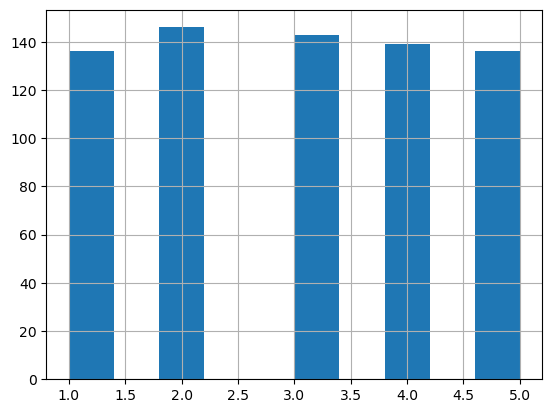

In [313]:
data['User Behavior Class'].hist()
#skoro balansirano
data['User Behavior Class'].value_counts()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [316]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent

User ID                        0.0
Device Model                   0.0
Operating System              10.0
App Usage Time (min/day)       0.0
Screen On Time (hours/day)     0.0
Battery Drain (mAh/day)        0.0
Number of Apps Installed       0.0
Data Usage (MB/day)           20.0
Age                            5.0
Gender                         0.0
User Behavior Class            0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [319]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoded_data = data.copy()  
for col in ['Device Model', 'Operating System', 'Gender']:
    encoded_data[col] = encoder.fit_transform(data[col])
encoded_data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0,393,6.4,1872,67,1122.0,40.0,1,4
1,2,1,0,268,4.7,1331,42,944.0,47.0,0,3
2,3,3,0,154,4.0,761,32,NaN,42.0,1,2
3,4,0,0,239,4.8,1676,56,871.0,20.0,1,3
4,5,4,1,187,4.3,1367,58,988.0,31.0,0,3


In [321]:
encoded_data['Operating System'].unique()

array([0, 1, 2])

In [323]:
data['Operating System'].unique()

array(['Android', 'iOS', nan], dtype=object)

In [325]:
import numpy as np
encoded_data['Operating System'] = encoded_data['Operating System'].replace(2, np.nan)

In [327]:
encoded_data['Operating System'].unique()

array([ 0.,  1., nan])

In [329]:
encoded_data.isnull().sum()

User ID                         0
Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

In [331]:
import seaborn as sns

In [333]:
#from sklearn.preprocessing import OneHotEncoder
#one_hot_destination = pd.get_dummies(data[['Device Model', 'Operating System', 'Gender']])
#one_hot_destination = one_hot_destination.astype(int)
#data = pd.concat([data, one_hot_destination], axis=1)
#data = pd.concat([data.drop(['Device Model', 'Operating System', 'Gender'], axis=1), 
                  # pd.get_dummies(data[['Device Model', 'Operating System', 'Gender']]).astype(int)], axis=1)
#data.head()

In [335]:
# duplicates = data.columns.duplicated()

# if duplicates.any():
#     print("Duplicate columns found:", data.columns[duplicates])
# else:
#     print("No duplicate columns found.")


<Axes: >

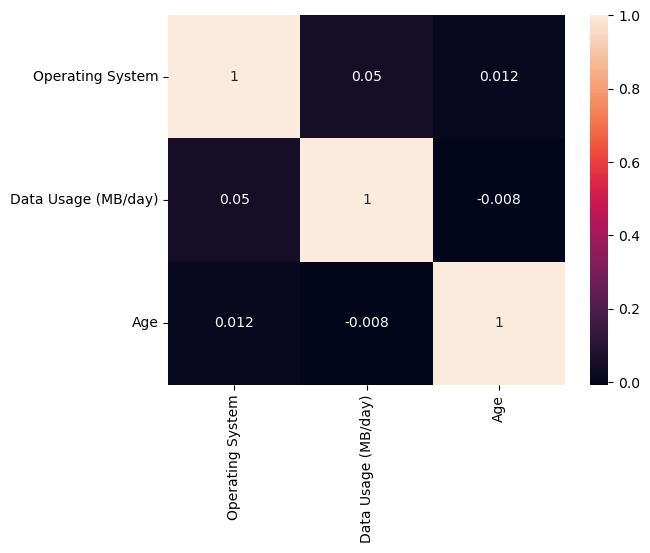

In [337]:
sns.heatmap(encoded_data[['Operating System', 'Data Usage (MB/day)', 'Age']].corr(), annot=True)

In [339]:
import missingno as msno

<Axes: >

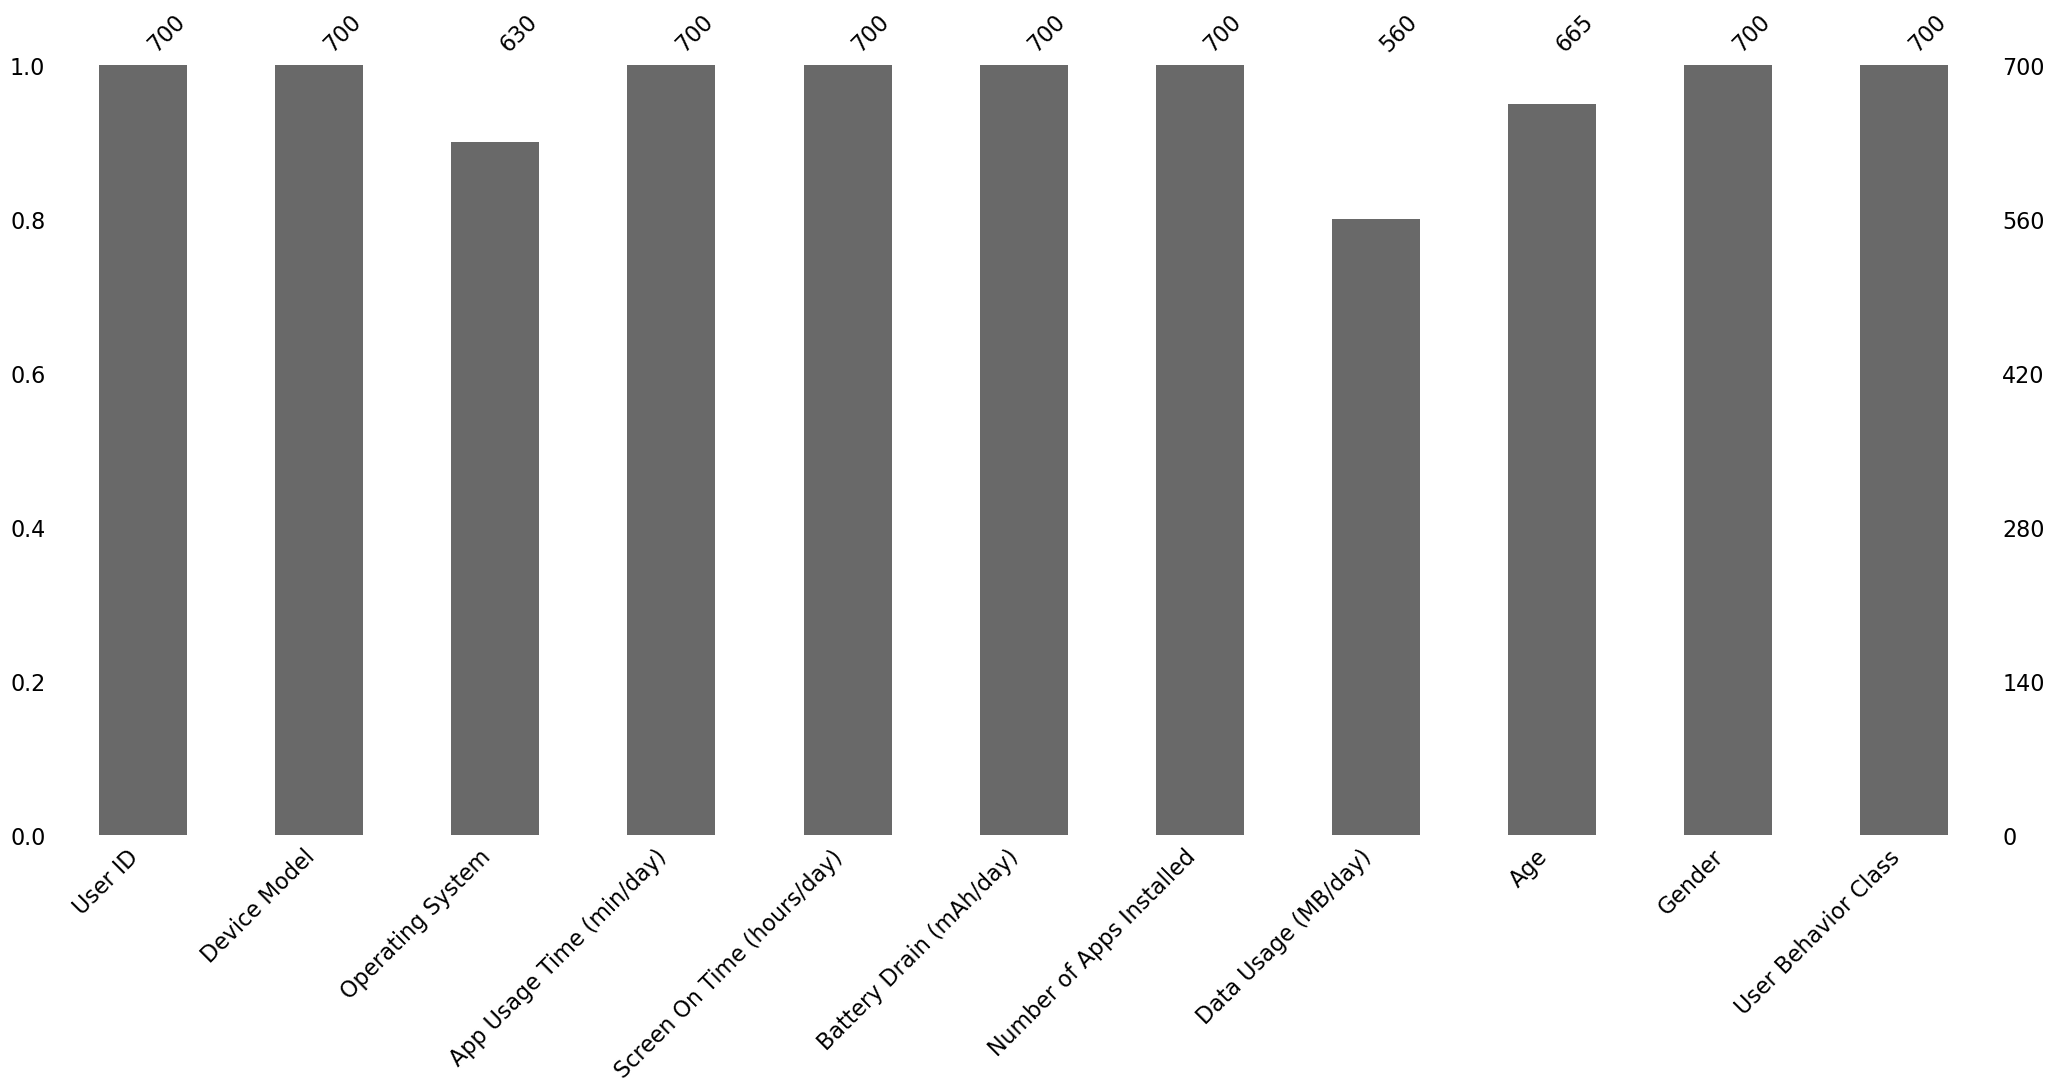

In [341]:
msno.bar(encoded_data)

<Axes: >

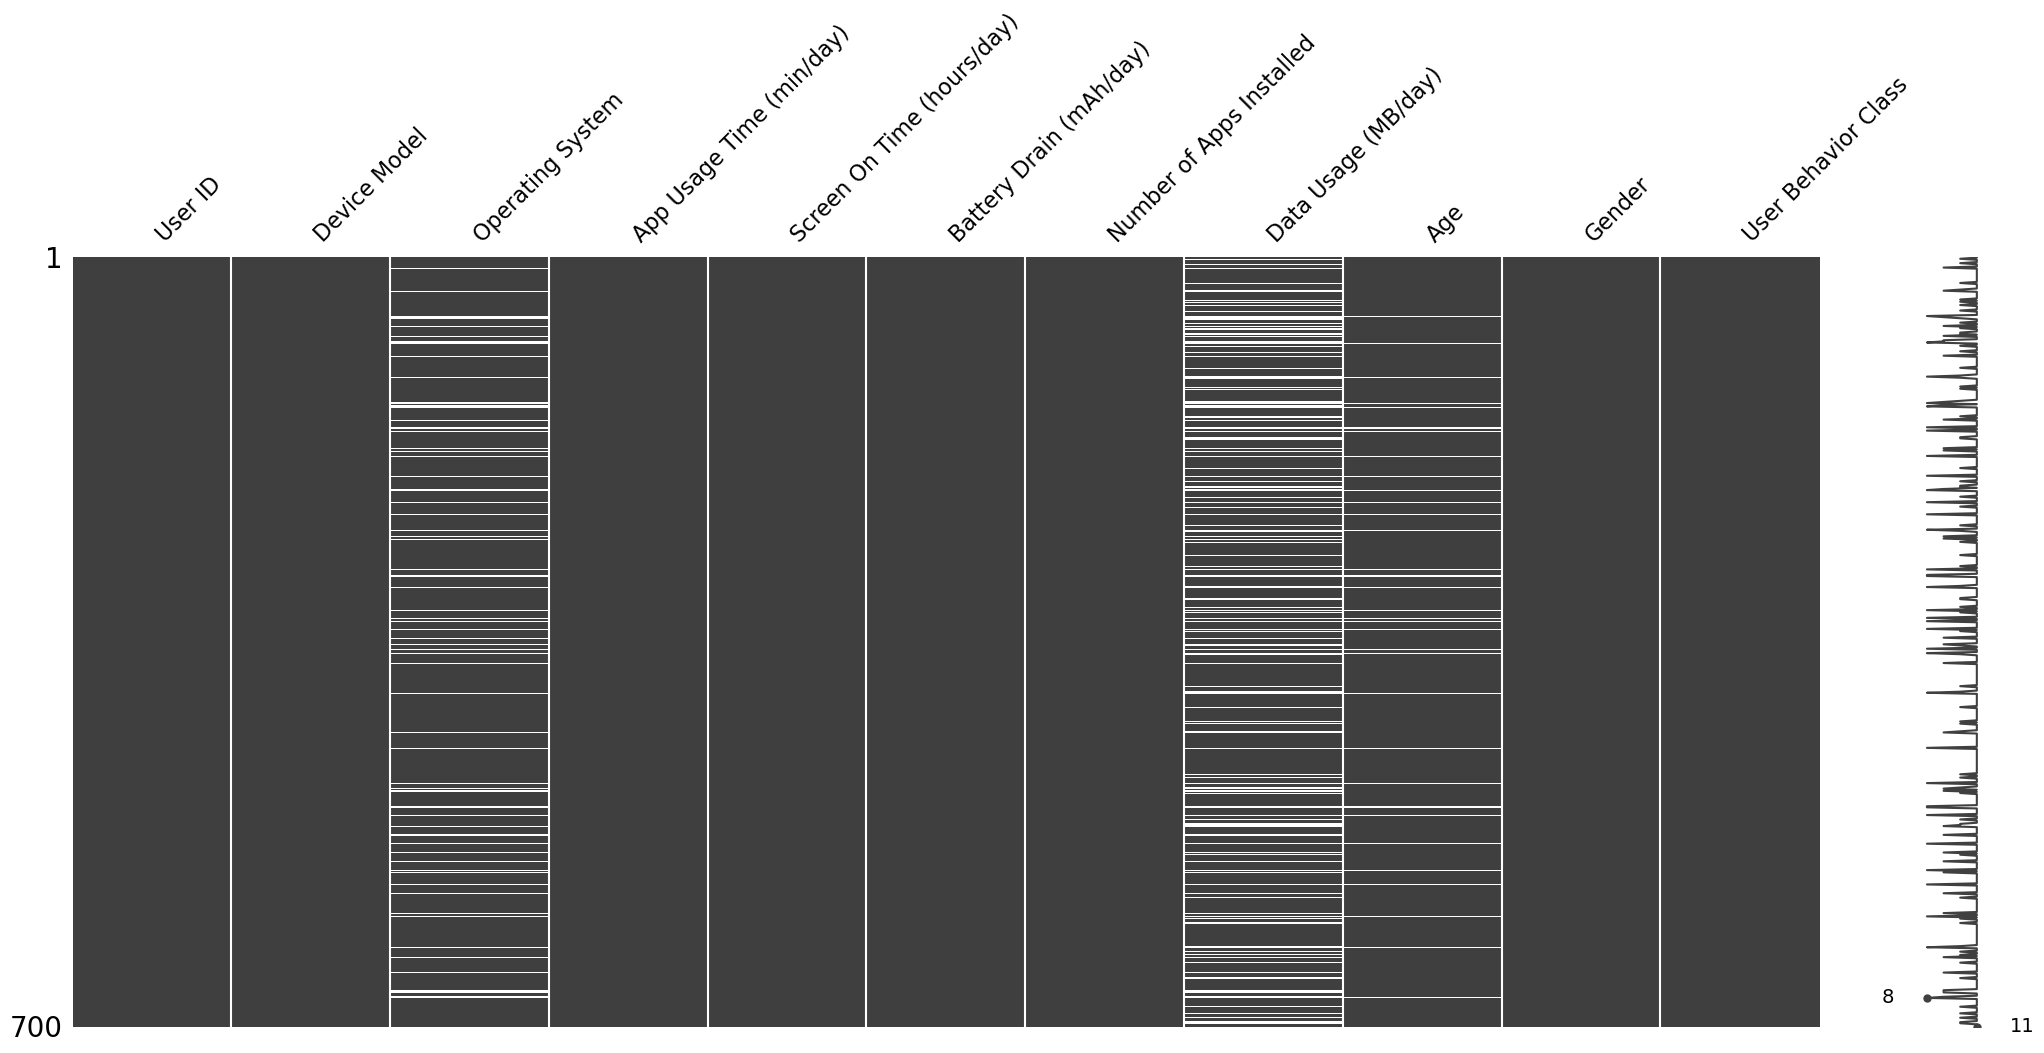

In [343]:
msno.matrix(encoded_data)


## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

<Axes: >

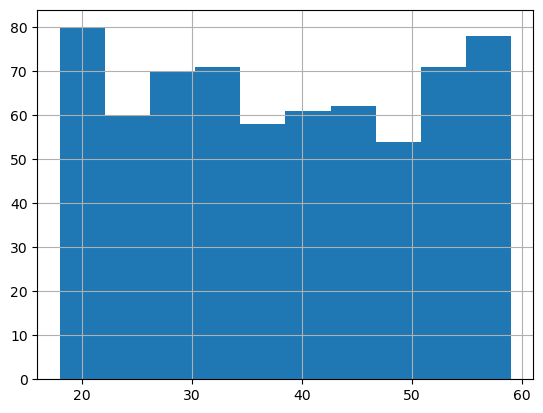

In [348]:
encoded_data['Age'].hist()
#ne e normalna raspredlba - znaci median

<Axes: >

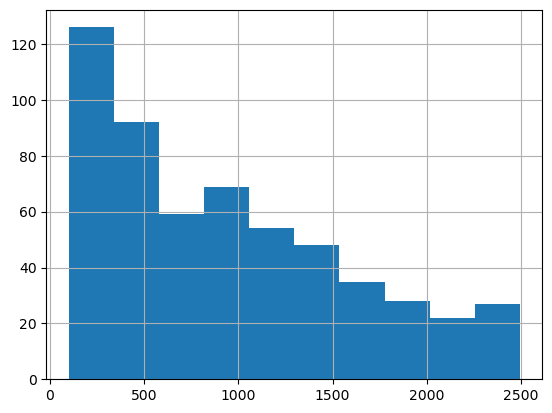

In [350]:
encoded_data['Data Usage (MB/day)'].hist()
#isto

In [352]:
knn_imputer = KNNImputer(n_neighbors=3)
encoded_data[['Operating System']]  = knn_imputer.fit_transform(encoded_data[['Operating System']])
median_imputer = SimpleImputer(strategy = 'median')
encoded_data[['Age', 'Data Usage (MB/day)']] = median_imputer.fit_transform(encoded_data[['Age', 'Data Usage (MB/day)']])
encoded_data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,0,0.0,393,6.4,1872,67,1122.0,40.0,1,4
1,2,1,0.0,268,4.7,1331,42,944.0,47.0,0,3
2,3,3,0.0,154,4.0,761,32,827.5,42.0,1,2
3,4,0,0.0,239,4.8,1676,56,871.0,20.0,1,3
4,5,4,1.0,187,4.3,1367,58,988.0,31.0,0,3


In [354]:
encoded_data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

<Axes: >

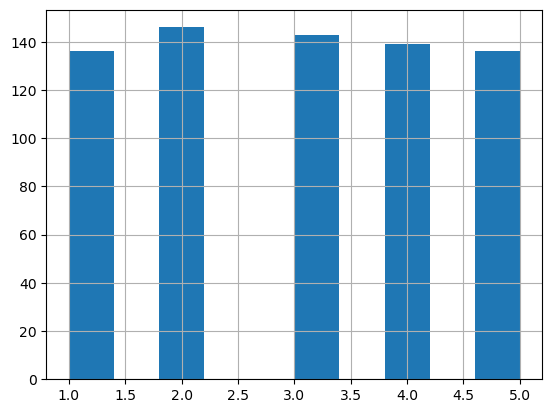

In [356]:
x = encoded_data.drop(['User ID', 'User Behavior Class'], axis=1)
y = encoded_data['User Behavior Class']
y.hist()

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [361]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_scaled

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1.00,1.000000,0.869718,0.927273,0.785953,0.898876,0.826818,0.268293,0.0
1,0.25,0.000000,0.140845,0.218182,0.250093,0.235955,0.170240,0.951220,0.0
2,0.75,0.000000,0.190141,0.190909,0.239688,0.213483,0.186213,0.731707,1.0
3,0.25,0.212698,0.102113,0.054545,0.043850,0.022472,0.304960,0.487805,0.0
4,0.00,0.212698,0.429577,0.454545,0.441100,0.516854,0.304960,0.487805,0.0
...,...,...,...,...,...,...,...,...,...
135,0.75,0.000000,0.096831,0.054545,0.042735,0.022472,0.008407,0.707317,1.0
136,0.00,0.000000,0.348592,0.345455,0.496841,0.415730,0.291719,0.585366,0.0
137,0.25,0.000000,0.941901,0.872727,0.807507,1.000000,0.630937,0.804878,0.0
138,1.00,1.000000,0.728873,0.600000,0.769231,0.752809,0.378310,0.268293,1.0


## Model Selection

Choose and train an approriate model for the given task.

In [365]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [367]:
model.fit(x_train_scaled,y_train)


LogisticRegression()

Use the trained model to make predictions for the test set.

In [370]:
y_pred = model.predict(x_test_scaled)
y_pred

array([5, 2, 2, 1, 3, 2, 4, 5, 2, 2, 3, 2, 5, 4, 2, 2, 1, 4, 5, 1, 4, 3,
       4, 2, 5, 3, 2, 3, 4, 3, 1, 4, 3, 1, 5, 2, 2, 5, 4, 2, 1, 1, 4, 1,
       1, 2, 4, 5, 2, 2, 2, 3, 5, 3, 1, 4, 5, 5, 2, 2, 3, 1, 4, 3, 4, 3,
       4, 4, 3, 3, 3, 2, 2, 5, 3, 3, 3, 3, 3, 1, 4, 2, 4, 2, 3, 3, 1, 1,
       2, 1, 2, 2, 4, 4, 5, 1, 1, 2, 5, 4, 3, 2, 4, 3, 5, 3, 4, 2, 2, 3,
       5, 1, 1, 4, 3, 2, 1, 2, 1, 4, 4, 4, 1, 2, 5, 4, 5, 2, 2, 3, 4, 2,
       3, 3, 4, 1, 3, 5, 4, 2], dtype=int64)

Assess the performance of the model by using different classification metrics.

In [373]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           1       0.91      1.00      0.95        21
           2       0.97      0.95      0.96        38
           3       1.00      0.97      0.98        32
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        19

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [474]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [477]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled=pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_scaled

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,1.00,1.0,0.286972,0.381818,0.377555,0.438202,0.303430,0.341463,0.0
1,1.00,1.0,0.024648,0.018182,0.060944,0.000000,0.012129,0.951220,0.0
2,0.00,0.0,0.007042,0.018182,0.080268,0.000000,0.028440,0.048780,0.0
3,0.00,0.0,0.894366,0.800000,0.920104,0.910112,0.827269,0.414634,0.0
4,1.00,1.0,0.250000,0.163636,0.272389,0.134831,0.303430,0.560976,1.0
...,...,...,...,...,...,...,...,...,...
65,0.50,0.0,0.147887,0.181818,0.308064,0.235955,0.206608,0.243902,1.0
66,0.25,0.0,0.181338,0.090909,0.261984,0.235955,0.131744,0.341463,1.0
67,0.25,0.0,0.903169,0.945455,0.986250,0.808989,0.669176,0.317073,1.0
68,1.00,1.0,0.183099,0.109091,0.228540,0.146067,0.134253,0.121951,1.0


## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [480]:
from sklearn.model_selection import KFold, RepeatedKFold
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(x, y)


50

In [482]:
from sklearn.tree import DecisionTreeClassifier

new_model = DecisionTreeClassifier()

In [484]:
param_grid ={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth': [5,10],
    'min_samples_split': [15,20,30,40,70],
    'min_samples_leaf' : [7,15,20,35]
    #kolku min primeroci treba da ima vo toj node za da moze da prodolzi da se razgranvua
    #kolku podatoci treba da ima za toa da stane list 
}

In [486]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=new_model,param_grid=param_grid,cv=rkf)

In [488]:
cv.fit(x,y)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10],
                         'min_samples_leaf': [7, 15, 20, 35],
                         'min_samples_split': [15, 20, 30, 40, 70]})

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [490]:
cv.best_score_


0.999857142857143

In [492]:
predict_model = cv.best_estimator_
y_pred = predict_model.predict(x_test_scaled)

In [494]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.21428571428571427

In [472]:
#ako best_score e mn dobar a accuracy nisko znaci ima overfit
#treba da se namale max_depth i da se zgolemat min samples 
#min sample leaf treba od 1 - 5% od rows
#min sample split = min sample leaf x 2